In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import joblib

In [75]:
df = sns.load_dataset('tips')

In [76]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
df.isnull().sum().sort_values(ascending=False)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Vemos que no tienen ningún dato nulo.



In [78]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### Exploración de datos
Las columnas sex,smoker,day y time las tenemos que pasar a numéricas.
Usamos él .unique() para ver que datos unicos hay en cada una de estas columnas y así más adelante poderles asignar un número.




In [79]:
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [80]:
df["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


Hacemos unas pequeñas investigaciones para ver como se distribuyen las propinas.




C:\Users\Guillermo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


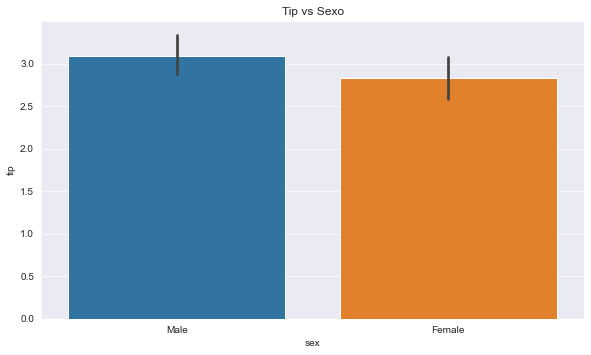

In [81]:
plt.figure(figsize=(16,14))

plt.subplot(321)
sns.barplot(df.sex, df.tip)
plt.title("Tip vs Sexo")


plt.tight_layout()
plt.show()

C:\Users\Guillermo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


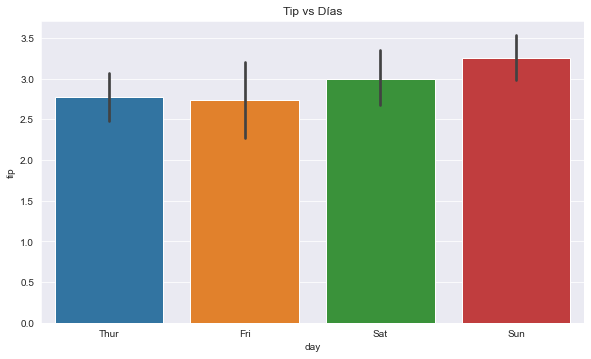

In [82]:
plt.figure(figsize=(16,14))

plt.subplot(324)
sns.barplot(df.day, df.tip, order=["Thur", "Fri", "Sat", "Sun"])
plt.title("Tip vs Días")


plt.tight_layout()
plt.show()

C:\Users\Guillermo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


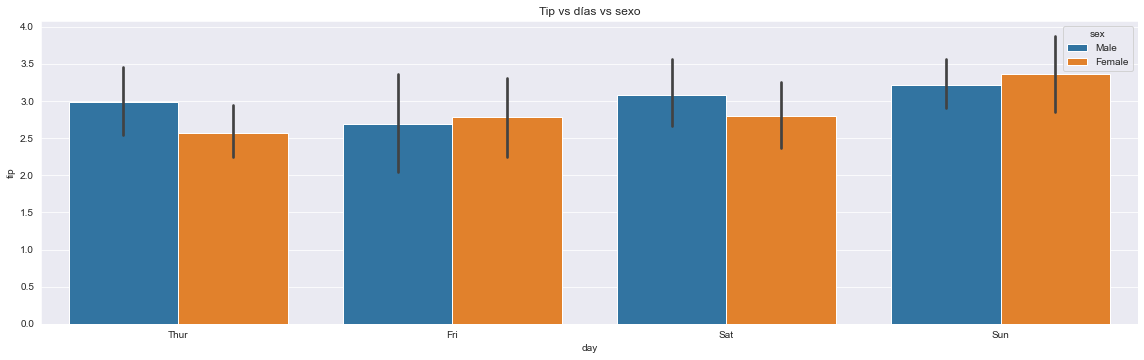

In [83]:
plt.figure(figsize=(16,14))

plt.subplot(313)
sns.barplot(df.day, df.tip, order=["Thur", "Fri", "Sat", "Sun"], hue=df.sex)
plt.title("Tip vs días vs sexo")

plt.tight_layout()
plt.show()

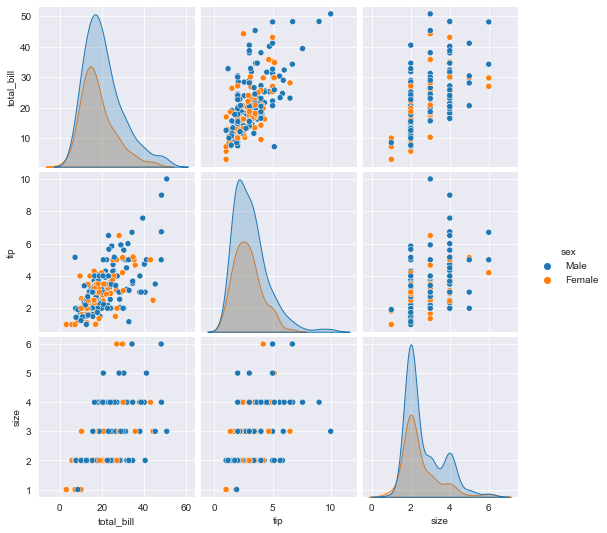

In [84]:
sns.pairplot(df, hue="sex")

plt.show()

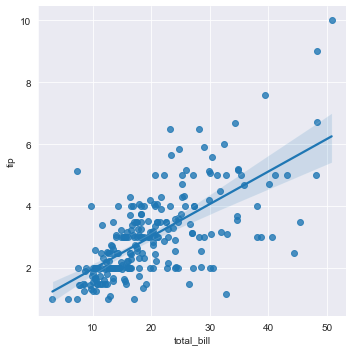

In [85]:
sns.lmplot(x='total_bill',y='tip',data=df)

### Preparación de columnas categóricas

Damos valores numéricos a las columnas categóricas

#### Smoker
 - yes = 1
 - no = 0

#### Sex
 - Female = 0
 - Male = 1

#### Day
 - Thur = 0
 - Fri = 1
 - Sat = 2
 - Sun = 3

#### Time
 - Lunch = 0
 - Dinner = 1



In [86]:
df["smoker"]= df["smoker"].map({"No": 0, "Yes": 1})

In [87]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})

In [88]:
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})

In [89]:
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})

In [90]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [91]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [92]:
df["smoker"] = pd.to_numeric(df["smoker"])

In [93]:
df["sex"] = pd.to_numeric(df["sex"])
df["day"] = pd.to_numeric(df["day"])
df["time"] = pd.to_numeric(df["time"])

In [94]:
df.dtypes

total_bill    float64
tip           float64
sex             int64
smoker          int64
day             int64
time            int64
size            int64
dtype: object

### Agregar nuevas columnas

Agregamos nuevas columnas para que tenga más datos a la hora de hacer el modelo.



In [95]:
df['tip_por_persona'] = np.round((df['total_bill'] / df['size']), 2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_por_persona
0,16.99,1.01,0,0,3,1,2,8.49
1,10.34,1.66,1,0,3,1,3,3.45
2,21.01,3.50,1,0,3,1,3,7.00
3,23.68,3.31,1,0,3,1,2,11.84
4,24.59,3.61,0,0,3,1,4,6.15


In [96]:
df['tips_%'] = np.round((df['tip']*100) / df['total_bill'] , 2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_por_persona,tips_%
0,16.99,1.01,0,0,3,1,2,8.49,5.94
1,10.34,1.66,1,0,3,1,3,3.45,16.05
2,21.01,3.50,1,0,3,1,3,7.00,16.66
3,23.68,3.31,1,0,3,1,2,11.84,13.98
4,24.59,3.61,0,0,3,1,4,6.15,14.68


In [97]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size,tip_por_persona,tips_%
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672,7.888197,16.079754
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100,2.914234,6.107020
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.880000,3.560000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.800000,12.910000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000,7.255000,15.475000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,9.390000,19.147500
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,20.270000,71.030000


Sacamos la media de propina por persona, que sería 7,25€


In [98]:
df['tip_por_persona'].median()

7.255

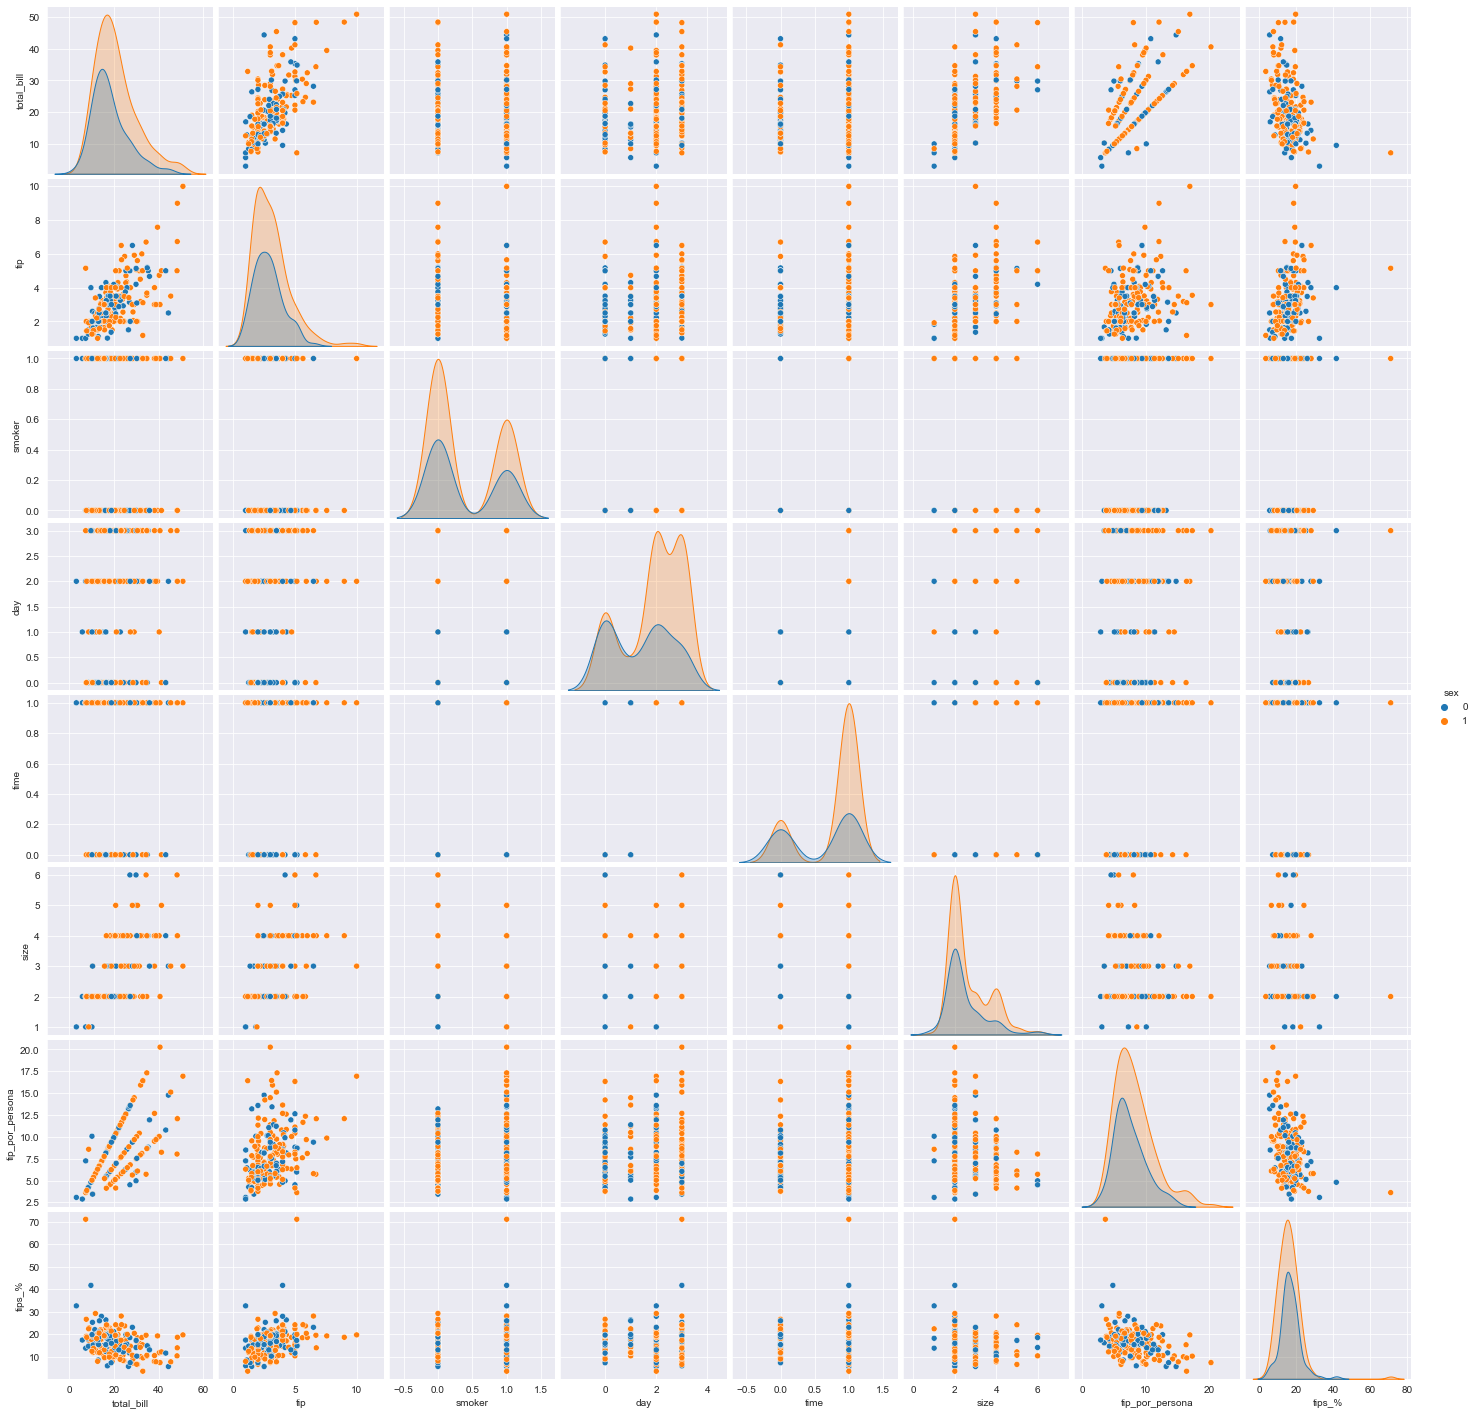

In [99]:
sns.pairplot(df, hue="sex")

plt.show()

### Correlación

Sacamos una correlación y vemos que las parejas de Total_Bill con tip, Total_Bill con tip_por_persona y Time con Day son las que más correlación tienen.

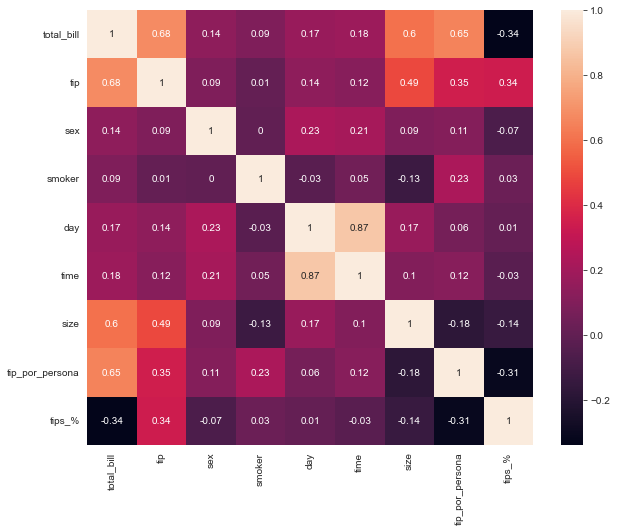

In [100]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'tip_por_persona'}>,
        <AxesSubplot:title={'center':'tips_%'}>]], dtype=object)

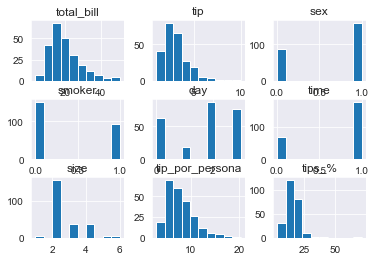

In [101]:
df.hist()

### Preparación de los conjuntos de prueba y entrenamiento



In [102]:
x = df.drop(columns = ['total_bill'])
y = df['total_bill']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Entrenamiento del modelo de regresión lineal


In [104]:

from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


### Resultados del entrenamiento


In [105]:
from sklearn.metrics import mean_absolute_error
print('R2 score training: ', lr.score(X_train, y_train))
print('R2 score test: ', lr.score(X_test, y_test))
print('MAE test: ', mean_absolute_error(y_test, y_pred))

R2 score training:  0.951822385553377
R2 score test:  0.9438215014206577
MAE test:  1.4539459757777489


## Exportar Modelo

In [106]:
joblib.dump(lr, 'model.joblib')

In [107]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_por_persona,tips_%
0,16.99,1.01,0,0,3,1,2,8.49,5.94
1,10.34,1.66,1,0,3,1,3,3.45,16.05
2,21.01,3.50,1,0,3,1,3,7.00,16.66
3,23.68,3.31,1,0,3,1,2,11.84,13.98
4,24.59,3.61,0,0,3,1,4,6.15,14.68


## Probamos el modelo

In [108]:
lr.predict([[1.01,0,0,3,1,2,8.49,5.94]])

C:\Users\Guillermo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.14766613])

Probamos a predecir el total_bill de la fila 0 y nos arroja un resultado con 0.15 € de error.

## Sacamos datos necesarios para la hora de subir el modelo a gcp

In [109]:
# Ver la versión de Scikit learn
from sklearn import __version__ as vv
print(vv)

1.0.2


In [110]:
# Ver la version de pyhton
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Guillermo\anaconda3\python.exe
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)
